### Resultados provenientes del código IPF-FDMC

A continuación se realizan los siguientes cálculos a partir del archivo de salida del código IPF-FDMC:
1. Generar mapas de contorno del valor raíz cuadrática media del campo eléctrico oscilante de las ondas electromagnéticas en el plasma durante la absorción estacionaria.

In [1]:
#librerías
import numpy as np
import matplotlib.pyplot as plt #gráficos
from scipy import interpolate #interpolación 1
from scipy.interpolate import griddata #interpolación 2
import h5py #archivos en hdf5
from jupyterlab_h5web import H5Web #librería
from pathlib import Path, PurePath #manejo de rutas y archivos
%run -i ./Funciones.py #funciones importante

#Graficación
idioma = 'español'
#idioma = 'ingles'


if idioma == 'español':
    #plt.prop_cycle(color=['0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97'])
    #axes.prop_cycle : cycler('color', ['0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97', '474747', '9e9e9e'])
    #Latex y coma como separador decimal
    plt.rcParams['text.usetex'] = True #latex
    #plt.rc('text', usetex=False)
    plt.rcParams['axes.formatter.use_locale'] = True #formato de eje para la coma
    #se incluye paquete matematico útil, se corrige el error con el espacio y el espacio entre los números
    plt.rc('text.latex', preamble=r'\usepackage{pifont} \usepackage{amsmath} \DeclareUnicodeCharacter{202F}{\,} \usepackage{ziffer} \usepackage{siunitx}') 
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
    })
    import locale #líbreria para el formato
    locale.setlocale(locale.LC_ALL, "es_CR.utf8")

if idioma == 'ingles' :
    plt.rc('text.latex', preamble=r'\usepackage{pifont} \usepackage{amsmath} \usepackage{siunitx}')
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
    })

import locale #líbreria para el formato
locale.setlocale(locale.LC_ALL, "es_CR.utf8")

'es_CR.utf8'

In [ ]:
H5Web('./campo_E/fileout_v46_n214.h5') #visualización

In [3]:
#Ver zonas específicas de propagación O y X
def zona_E(archivo, a, a1, b, c, d) :
    import cmocean #https://matplotlib.org/cmocean/ mapas de colores finos
    #https://stackoverflow.com/questions/26065811/same-color-bar-range-for-different-plots-matplotlib
    ruta_archivo = PurePath(Path(archivo)) #archivo 
    with h5py.File(ruta_archivo,'r') as E_rms_hdf5: #lectura archivo hdf
        E_rms = E_rms_hdf5[a][...][...]
        lamb = 3.0e8/2.45e9
        #nfa = 1
        #deltar1 = -0.02 # n = 2.14
        #deltar2 = 0
        #deltaz1 = 0
        #deltaz2 = 0
        
        f = 0.48
        nfa_r = 0.75*f
        nfa_z = 0.75*f
        
        #nfa_r = 0
        #nfa_z = 0
        
        deltar1 = -0.004
        deltar2 = 0
        deltaz1 = 0
        deltaz2 = 0
        
        
        #Se reduce una longitud de onda en el grid al realizar la disminución del grid a la mitad
        r_1 = -0.2936852843 + lamb*nfa_r + deltar1
        r_2 = 0.79555369743 - lamb*nfa_r + deltar2
        z_1 = -0.5197728143 + lamb*nfa_z + deltaz1
        z_2 = 0.5197728143 - lamb*nfa_z + deltaz2
        r = np.linspace(r_1, r_2, 2267) 
        z = np.linspace(z_1, z_2, 2169)
        #coordenadas que cumplen la condición
        r_indices = np.where( (r >= a1) & (r <= b) )
        z_indices = np.where((z>= c) & (z <= d)  )
        
        #coordenadas nuevas
        r_nueva = r[r_indices]
        z_nueva = z[z_indices]
        rr , zz = np.meshgrid(r_indices[0], z_indices[0]) #construir malla de coordenadas
        E_rms_final = E_rms[rr, zz] #Asigna las coordenadas malla para obtener los valores
        return E_rms_final, r_nueva, z_nueva

la radación máxima es  0.055298273
la radación máxima es  0.5453048
la radación máxima es  6.066771
la radación máxima es  6.066771
la radación máxima es  19.743492
la radación máxima es  19.743492


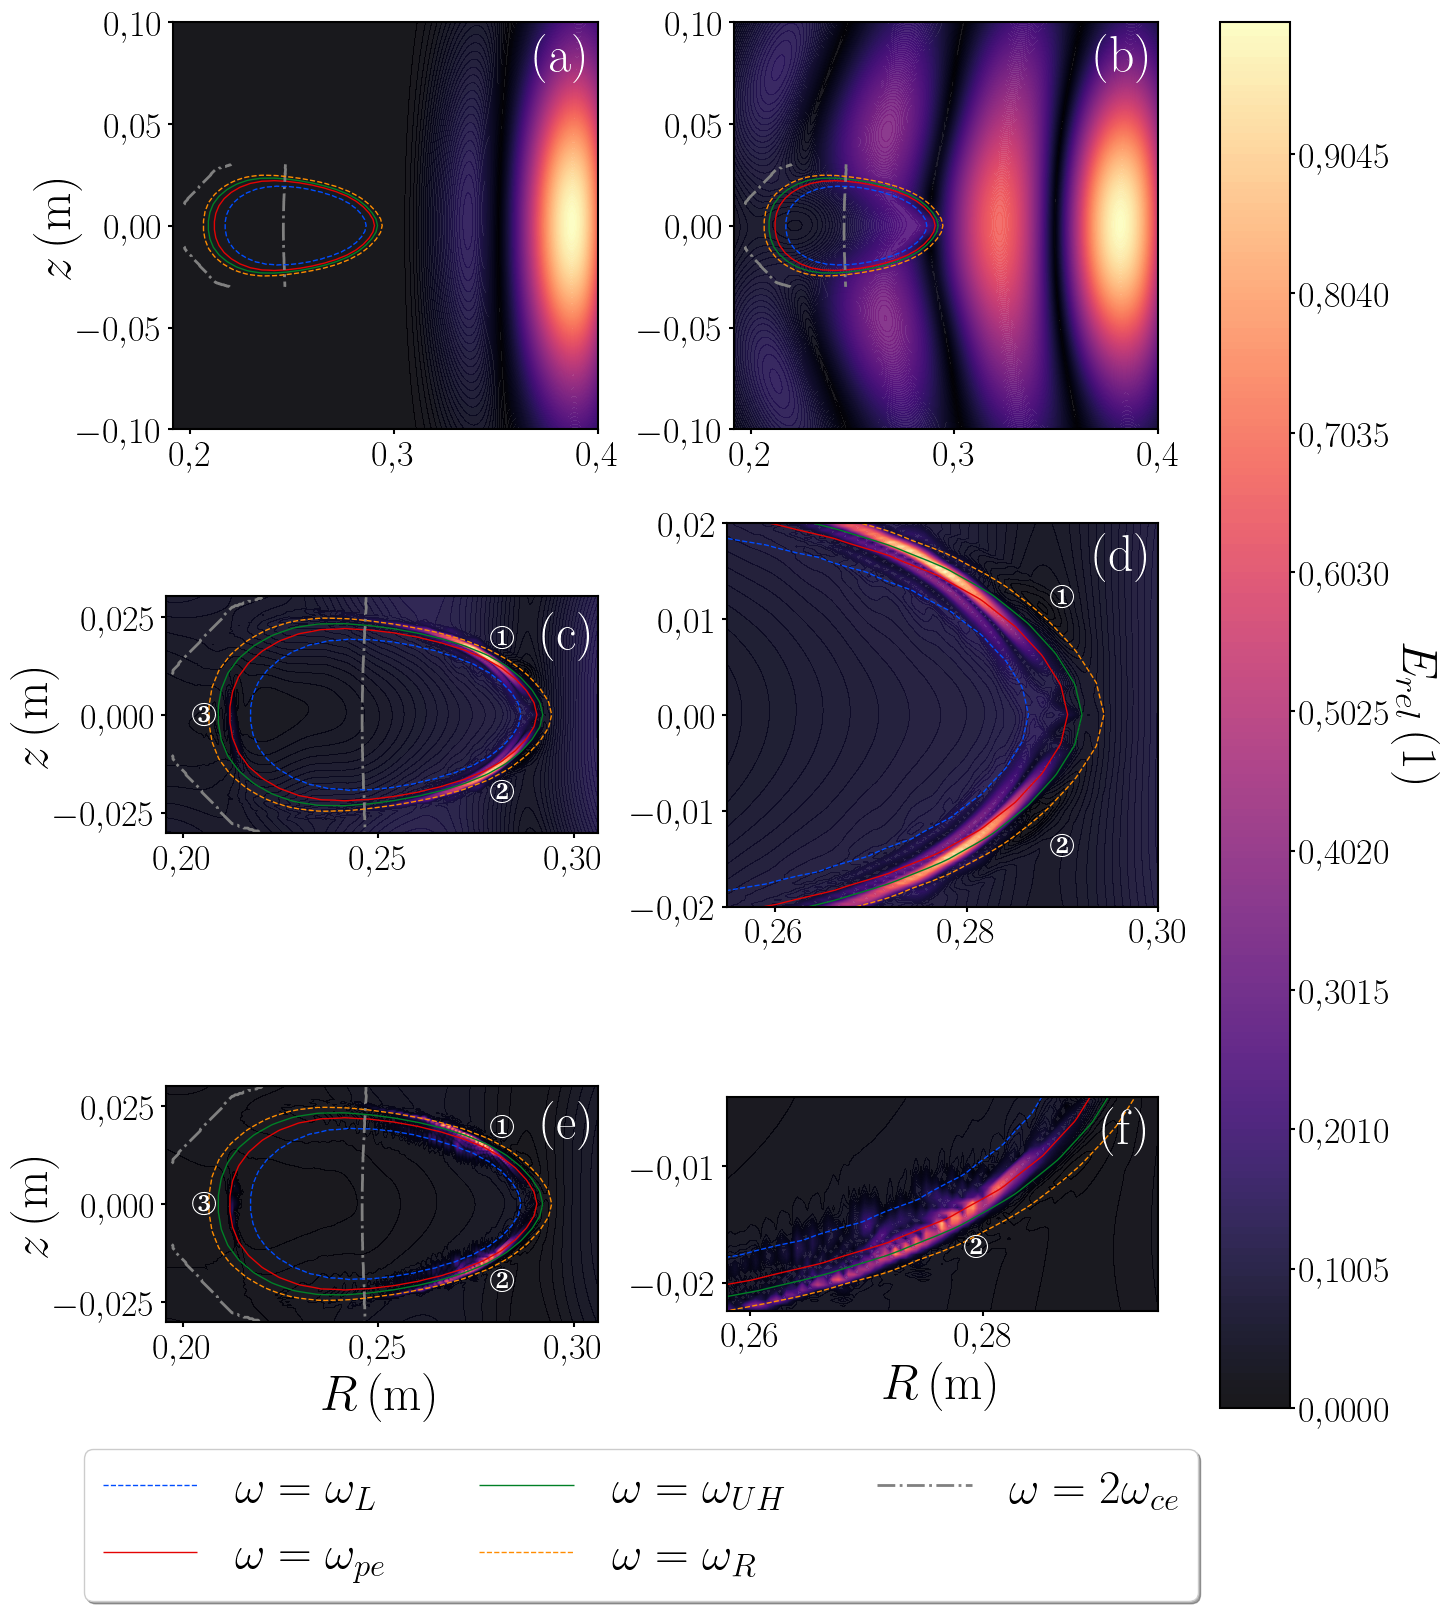

In [5]:
#https://stackoverflow.com/questions/13784201/how-to-have-one-colorbar-for-all-subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,18))
n = 0
conversion = np.array(['T0001__E_abs', 'T0003__E_abs', 'T0012__E_abs', 'T0012__E_abs', 'T0040__E_abs', 'T0040__E_abs'])
 
for ax in axes.flat: #Logra asignar las características a la cantidad de subplots seleccionados
    
    archivo = './campo_E/fileout_v46_n214.h5'

    E_rms_final, r_nueva, z_nueva = zona_E(archivo, conversion[n],
                                          0.1957178997475323*0.98, 0.3060799*1.5, 
                                         -0.03031574*4.5, 0.03031574*4.5) #hacia el plasma
    cmap = "magma"
    l = np.max(E_rms_final)
    print("la radación máxima es ", l)
    v_min = np.min(E_rms_final)
    v_max = l
    #levels3 = np.linspace(v_min, v_max, 200)
    levels3 = np.linspace(0, 1, 200)
    #print(l, v_min)
    if n == 3 :
        a1 = 0.255 
        b = 0.30
        c = -0.02
        d = 0.02
    elif n == 5 :
        a1 =  0.263
        b = 0.29
        c = -0.022*1.02
        d = -0.004*1.02
    elif n==2 or n==4:
        a1 =  0.1957178997475323
        b = 0.3060799
        c = -0.03031574
        d = 0.03031574
    else:
        a1 = 0.1957178997475323*0.98 
        b = 0.40
        c = -0.1
        d = 0.1
    
    h1 =  ax.contourf(r_nueva, z_nueva,  E_rms_final/l, extent=(a1,b,c,d), alpha=0.9, 
        vmin = 0, vmax = 1, levels=levels3, cmap=cmap) #correcto
    
    letras = np.array([r'$\textrm{(a)}$', r'$\textrm{(b)}$', r'$\textrm{(c)}$', 
                        r'$\textrm{(d)}$', r'$\textrm{(e)}$', r'$\textrm{(f)}$'])
    
    #corte frecuencia ciclotrónica electronica y frecuencia híbrida superior
    ne_norm = np.loadtxt('./regiones_importantes/ne_norm.txt')
    wce_norm = np.loadtxt('./regiones_importantes/wec_norm.txt')
    wuh_norm = np.loadtxt('./regiones_importantes/wuh_214.txt')
    wR_norm = np.loadtxt('./regiones_importantes/wR_norm.txt')
    wL_norm = np.loadtxt('./regiones_importantes/wL_norm.txt')
    
    grid_r, grid_z = np.mgrid[0.1971346:0.306079:297j, -0.03002686:0.03010837:165j] #cero grados - bsolctra solo 1000
    levels = np.arange(1.0, 1.01, 1) #O mode cut-off
    levels1 = np.arange(0.75,0.90, 0.1)
    levels_ce = np.arange(0.5,0.501, 0.5)
    
    #fig.tight_layout()
    plt.gca().set_aspect('equal')
    plt.setp(ax.spines.values(), linewidth=1.5)
    plt.subplots_adjust(wspace=0.3) #ajustar el espacio entre subplots
    omode = ax.contour(grid_r, grid_z, ne_norm, levels, linestyles = 'solid', colors = '#e40303', linewidths = 1) # to plot the contour
    uh = ax.contour(grid_r,grid_z, wuh_norm, levels, linestyles = 'solid', colors = '#008026', linewidths = 1)
    ce = ax.contour(grid_r,grid_z, wce_norm, levels_ce, linestyles = 'dashdot', colors = 'gray', linewidths =2)
    R = ax.contour(grid_r,grid_z, wR_norm, levels, linestyles = 'dashed', colors = '#ff8c00', linewidths = 1)
    L = ax.contour(grid_r,grid_z,  wL_norm, levels, linestyles = 'dashed', colors = '#004dff', linewidths =1)
    ax.set_xlim(a1, b)
    ax.set_ylim(c, d)
    if n == 5 :
        ax.set_xlim(a1-0.005, b+0.005)
    
    if n == 2 :
        ax.text(0.75, 0.78, r'\ding{172}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        ax.text(0.75, 0.13, r'\ding{173}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        ax.text(0.06, 0.455, r'\ding{174}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
    if n == 3 :
        ax.text(0.75, 0.78, r'\ding{172}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        ax.text(0.75, 0.13, r'\ding{173}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        #ax.text(0.06, 0.455, r'\ding{174}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
    if n == 4 :
        ax.text(0.75, 0.78, r'\ding{172}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        ax.text(0.75, 0.13, r'\ding{173}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        ax.text(0.06, 0.455, r'\ding{174}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
    if n == 5 :
        #ax.text(0.75, 0.78, r'\ding{172}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        ax.text(0.55, 0.25, r'\ding{173}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        #ax.text(0.06, 0.455, r'\ding{174}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)

    #ejes en igual proporción
    #if n == 3:
        #plt.xlim(a1,b )
        #plt.ylim(c, d )
    #if n == 5:
        #plt.xlim(a1+0.001,b +0.001)
        #plt.ylim(c+0.00001, d +0.00001)
    #else:
        #plt.xlim(a1+ 0.001, b+0.001)
        #plt.ylim(c+0.1, d+0.01)
    
    if n==0 or n==1 or n==3 :
        ax.text(0.85, 0.88, letras[n], fontsize=36, fontdict=None, color='white', transform=ax.transAxes)
    else:
        ax.text(0.87, 0.78, letras[n], fontsize=36, fontdict=None, color='white', transform=ax.transAxes)
    ax.set_aspect('equal')  # Ajustar el aspecto de cada subplot
    ax.tick_params(axis='both', labelsize=26, width=1.5)
    #ax.text(0.05, 0.88, letras[n], fontsize=36, fontdict=None, color='white', transform=ax.transAxes)
    #ax[0].set_text(0.83,0.92, letras[cont_1][i], fontsize =36, 
                         #fontdict=None, color='white', transform=ax[cont_1,i].transAxes ) #Etiquetar gráfica
    n += 1
    
axes[0,0].set_ylabel(r'$ z\left( \si{\metre} \right)$', 
                fontdict = {'fontsize':36, 'fontweight':'bold', 'color':'black'}, labelpad = -5)
axes[1,0].set_ylabel(r'$ z\left( \si{\metre} \right) $', 
                fontdict = {'fontsize':36, 'fontweight':'bold', 'color':'black'}, labelpad = -5)
axes[2,0].set_ylabel(r'$ z\left( \si{\metre} \right) $', 
                fontdict = {'fontsize':36, 'fontweight':'bold', 'color':'black'}, labelpad = -5)
axes[2,0].set_xlabel(r'$ R \left( \si{\metre} \right)$', 
                fontdict = {'fontsize':36, 'fontweight':'bold', 'color':'black'}, labelpad = 5)
axes[2,1].set_xlabel(r'$ R \left( \si{\metre} \right)$', 
                fontdict = {'fontsize':36, 'fontweight':'bold', 'color':'black'}, labelpad = 5)
#Leyenda en mapa de calor
cont_0,_ = L.legend_elements()
cont_1,_ = omode.legend_elements()
cont_2,_ = uh.legend_elements()
cont_3,_ = R.legend_elements()
cont_4,_ = ce.legend_elements()   

plt.legend([cont_0[0], cont_1[0], cont_2[0], cont_3[0], cont_4[0]], 
    [r'{$\omega = \omega_{L}$}', r'{ $\omega = \omega_{pe}$ }', r'{$\omega = \omega_{UH}$}', r'{$\omega = \omega_{R}$}', 
    r'{$\omega = 2 \omega_{ce}$}'], fontsize = 34, loc='center', frameon=True,  bbox_to_anchor=(-0.2, -1),   ncol=3, fancybox=True, shadow=True)
cbar = plt.colorbar(h1, ax=axes.ravel().tolist())
#cbar.set_ticks(np.arange(0,13.3,0.5)) #B=B0
cbar.set_label(r'$ E_{rel} \left( 1 \right)$',  
                  fontdict = {'fontsize':36, 'fontweight':'bold', 'color':'black'}, rotation=270, labelpad=35)
cbar.ax.tick_params(labelsize=26, width=1.5)
cbar.outline.set_linewidth(1.5) #ancho del borde de la barra
plt.savefig('conversionOXB.png', dpi=300, bbox_inches='tight')
if idioma == 'español':
    plt.savefig('conversionOXB.png', dpi=300, bbox_inches='tight') 
if idioma == 'ingles' :
    #plt.savefig('conversionOXB.eps', format='eps', dpi=300, bbox_inches='tight') #paper IOP
    plt.savefig('conversionOXB.png', dpi=300, bbox_inches='tight') 
plt.show()

In [11]:
#Ver zonas específicas de propagación O y X
def zona_E(archivo, a, a1, b, c, d) :
    #https://matplotlib.org/cmocean/ mapas de colores finos
    #https://stackoverflow.com/questions/26065811/same-color-bar-range-for-different-plots-matplotlib
    ruta_archivo = PurePath(Path(archivo)) #archivo 
    with h5py.File(ruta_archivo,'r') as E_rms_hdf5: #lectura archivo hdf
        E_rms = E_rms_hdf5[a][...][...]
        lamb = 3.0e8/2.45e9
        nfa = 1
        #deltar1 = 0.010 # n = 1.48
        deltar1 = 0.015 # n = 2.14
        deltar2 = 0
        deltaz1 = 0
        deltaz2 = 0
        #Se reduce una longitud de onda en el grid al realizar la disminución del grid a la mitad
        r_1 = -0.2936852843 + lamb*nfa + deltar1
        r_2 = 0.79555369743 - lamb*nfa + deltar2
        z_1 = -0.5197728143 + lamb*nfa + deltaz1
        z_2 = 0.5197728143 - lamb*nfa + deltaz2
        r = np.linspace(r_1, r_2, 2267) 
        z = np.linspace(z_1, z_2, 2169)
        #coordenadas que cumplen la condición
        r_indices = np.where( (r >= a1) & (r <= b) )
        z_indices = np.where((z>= c) & (z <= d)  )
        
        #coordenadas nuevas
        r_nueva = r[r_indices]
        z_nueva = z[z_indices]
        rr , zz = np.meshgrid(r_indices[0], z_indices[0]) #construir malla de coordenadas
        E_rms_final = E_rms[rr, zz] #Asigna las coordenadas malla para obtener los valores
        return E_rms_final, r_nueva, z_nueva



def plotE_rms(E_rms_final,r_nueva, z_nueva, a1, b, c, d, v_min, v_max, cmap, n, figura):
        import cmocean
        #cmap = "magma"
        #cmap = cmocean.cm.amp
        
        print(np.min(E_rms_final), np.max(E_rms_final))
        
        #corte frecuencia ciclotrónica electronica y frecuencia híbrida superior
        ne_norm = np.loadtxt('./regiones_importantes/ne_norm.txt')
        wuh_norm = np.loadtxt('./regiones_importantes/wuh_214.txt')
        wR_norm = np.loadtxt('./regiones_importantes/wR_norm.txt')
        wL_norm = np.loadtxt('./regiones_importantes/wL_norm.txt')
        grid_r, grid_z = np.mgrid[0.1971346:0.306079:297j, -0.03002686:0.03010837:165j] #cero grados - bsolctra solo 1000
        levels = np.arange(1.0, 1.01, 1) #O mode cut-off
        levels1 = np.arange(0.75,0.90, 0.1)
        
        
        plt.ylabel(r'$ z \left( \si{\metre} \right) $', 
                  fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'}, labelpad = -5)
        plt.xlabel(r'$ R \left( \si{\metre} \right) $',  
                  fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
        plt.tick_params(axis='both', labelsize=14, width=1.5)
        ax = plt.gca()
        plt.setp(ax.spines.values(), linewidth=1.5)
        
        
        omode = plt.contour(grid_r, grid_z, ne_norm, levels, linestyles = 'solid', colors = 'blue', linewidths = 1) # to plot the contour
        omode_coords = omode.collections[0].get_paths()[0].vertices
        uh = plt.contour(grid_r,grid_z, wuh_norm, levels, linestyles = 'dashed', colors = 'green', linewidths = 1)
        R = plt.contour(grid_r,grid_z, wR_norm, levels, linestyles = 'solid', colors = 'red', linewidths = 1)
        L = plt.contour(grid_r,grid_z,  wL_norm, levels, linestyles = 'solid', colors = 'orange', linewidths =1)
        
        #plt.clabel(uh, inline=True, fontsize=10)
        #https://stackoverflow.com/questions/26065811/same-color-bar-range-for-different-plots-matplotlib   
        
        #Extraer las coordenadas x e y del contorno
        contour_x = omode_coords[:, 0]
        contour_y = omode_coords[:, 1]
   
        
        #plt.gcf().set_size_inches(16, 12)
        levels3 = np.linspace(v_min, v_max, n)
        #alpha=0.9
        #v_min = np.min(E_rms_final)
        #v_max = np.max(E_rms_final)
        print("la radiación máxima es", v_max)
        
        h1 =  plt.contourf(r_nueva, z_nueva,  E_rms_final, extent=(a1,b,c,d), alpha=0.9, 
                           vmin = v_min, vmax = v_max, levels=levels3, cmap=cmap) #correcto
           
        # Rellenar el área con blanco
        #plt.fill(contour_x, contour_y, 'purple')
        #ac = plt.colorbar(h1, orientation='vertical', shrink=0.8)
    
        #ejes en igual proporción
        plt.xlim(a1,b)
        plt.ylim(c, d)
        #ax.text(0.79,0.02, "(a)", fontsize =16, fontdict=None, color='black', transform=ax.transAxes ) #Etiquetar gráfica
        #ax.text(0.88,0.02,  "(b)", fontsize =16, fontdict=None, color='white', transform=ax.transAxes ) #Etiquetar gráfica
        #ax.text(0.88,0.02,  "(c)", fontsize =16, fontdict=None, color='white', transform=ax.transAxes ) #Etiquetar gráfica
        #ax.text(0.85,0.02,  "(d)", fontsize =16, fontdict=None, color='white', transform=ax.transAxes ) #Etiquetar gráfica
        #ax.text(0.85,0.02,  "(e)", fontsize =16, fontdict=None, color='white', transform=ax.transAxes ) #Etiquetar gráfica
        #ax.text(0.85,0.02,  "(f)", fontsize =16, fontdict=None, color='white', transform=ax.transAxes ) #Etiquetar gráfica

        
        #plt.axis('equal')
        plt.gca().set_aspect("equal")
        #plt.show()
        
        #plt.savefig(figura, dpi=300, bbox_inches='tight') 
        return

0.0012847662 2.686313
la radiación máxima es 0.05572


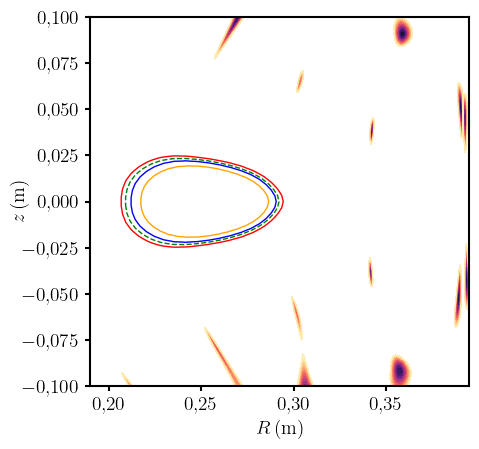

In [16]:
#Propagación O - 1
datos, r, z = zona_E('./campo_E/fileout_v46_n214.h5',  'T0008__E_abs', 0.1957178997475323*0.98, 0.3060799*1.5, 
               -0.03031574*4.5, 0.03031574*4.5) #hacia el plasma
plotE_rms(datos, r, z,  0.19, 0.395, -0.1, 0.1, 0.009, 0.05572, "magma", 15, 'Propagacion_O.png')

In [ ]:
#Reflexión O - 2
datos, r, z = zona_E('./campo_E/fileout_v46_n214.h5',  'T0003__E_abs', 0.1957178997475323*0.98, 0.3060799*1.5, 
               -0.03031574*4.5, 0.03031574*4.5) #hacia el plasma
plotE_rms(datos, r, z,  0.19, 0.395, -0.1, 0.1,2.7698514e-05, 0.5453048, "magma", 15, 'Reflexión_O.png')

In [ ]:
#Conversión O-X - 3
datos, r, z = zona_E('./campo_E/fileout_v46_n214.h5',  'T0012__E_abs', 0.1957178997475323*0.98, 0.3060799*1.5, 
               -0.03031574*4.5, 0.03031574*4.5) #hacia el plasma
#plotE_rms(datos, r, z,  0.19, 0.395, -0.1, 0.1, 0.334, 0.555, "viridis")
plotE_rms(datos, r, z,  0.19, 0.395, -0.1, 0.1, 0.0020289049, 1.0, "magma", 15, 'conversionOX.png')
plotE_rms(datos, r, z,  0.19, 0.35, -0.05, 0.05, 1.1, 29.307226, "hot", 15, 'conversionOX.png')

0.00078808673 6.066771
la radiación máxima es 1.25
0.00078808673 6.066771
la radiación máxima es 2.47


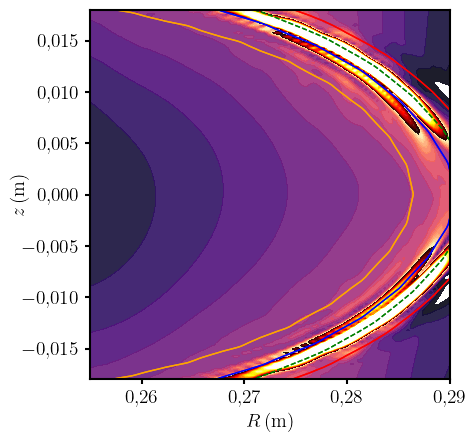

In [17]:
#Conversión O-X - 3
datos, r, z = zona_E('./campo_E/fileout_v46_n214.h5',  'T0012__E_abs', 0.1957178997475323*0.98, 0.3060799*1.5, 
               -0.03031574*4.5, 0.03031574*4.5) #hacia el plasma
#plotE_rms(datos, r, z,  0.19, 0.395, -0.1, 0.1, 0.334, 0.555, "viridis")
plotE_rms(datos, r, z,  0.19, 0.395, -0.02, 0.02, 0.1, 1.25, "magma", 15, 'conversionOX_1.png')
plotE_rms(datos, r, z,  0.255, 0.29, -0.018, 0.018, 1.250, 2.47, "hot", 45, 'conversionOX_1.png') #-0.018, -0.005, 

In [ ]:
#Conversión X-B - 4
datos, r, z = zona_E('./campo_E/fileout_v46_n214.h5',  'T0025__E_abs', 0.1957178997475323*0.98, 0.3060799*1.5, 
               -0.03031574*4.5, 0.03031574*4.5) #hacia el plasma
plotE_rms(datos, r, z,  0.19, 0.35, -0.05, 0.05,0.0020289049, 1.0, "magma", 15, 'ConversionXB.png')
plotE_rms(datos, r, z,  0.19, 0.35, -0.05, 0.05, 1.2501, 14.78, "hot", 5, 'ConversionXB.png')

In [ ]:
#Conversión X-B - 4
datos, r, z = zona_E('./campo_E/fileout_v46_n214.h5',  'T0025__E_abs', 0.1957178997475323*0.98, 0.3060799*1.5, 
               -0.03031574*4.5, 0.03031574*4.5) #hacia el plasma
plotE_rms(datos, r, z,  0.19, 0.395, -0.02, 0.02, 0.00029074846, 0.5, "magma", 18, 'ConversionXB_1.png') 
plotE_rms(datos, r, z,  0.275, 0.294, -0.016, -0.005,  0.51, 11.325819, "hot", 18, 'ConversionXB_1.png')

### Resultados provenientes del código IPF-FDMC

¿Hay posibilidad de que las ondas B se disipen por algún fenómeno del plasma?

In [ ]:
#Se busca la longitud de onda de la conversión X-B
from scipy.interpolate import make_interp_spline
#R1 = 0.265
#R2 = 0.275
#Z1 = -0.015
#Z2 = -0.010

R1 = 0.2825
R2 = 0.2850
Z1 = -0.014
Z2 = -0.012

datos1, r1, z1 = zona_E('./campo_E/fileout_v46_n148.h5',  'T0055__E_rms', R1, R2, Z1, Z2) #hacia el plasma
#datos1, r1, z1 = zona_E('./campo_E/fileout_v46_n214.h5',  'T0055__E_rms', R1, R2, Z1, Z2) #hacia el plasma
#datos1, r1, z1 = zona_E('./campo_E/fileout_v46_n185.h5',  'T0055__E_abs', R1, R2, Z1, Z2) #hacia el plasma

#r1 =  r1 - 0.247

#Método 1 
distancia = np.repeat(r1[:, np.newaxis], len(z1), axis=1)
distancia_flattened = distancia.flatten()
#print(distances_flattened)

#Método 2 
#R, Z = np.meshgrid(r1, z1)
#Distancia entre puntos de la malla
#distancia = np.linalg.norm(np.array([R.flatten(), Z.flatten()]), axis=0)


#Matriz de campo electrico
datos1_flattened = datos1.T.flatten()
#print(r1.shape, z1.shape, datos1_flattened.shape)
#print(distancia.shape, datos1_flattened.shape)


#plt.plot(distancia, datos1_flattened, 'o')
plt.plot(distancia_flattened, datos1_flattened, '-')
#plt.xlabel('distancia (m)')
#plt.ylabel('E_rms')
#plt.xlim(0.00994, 0.01211)

#Chequear lambda_B
#plt.xlim(0.270508, 0.27088) # n = 2.14 
#plt.xlim(0.28312, 0.28386) # n = 1.85
plt.xlim(0.28258, 0.28333) # n = 1.85


lambda_B = np.absolute(0.28258 - 0.28333)


r_larmor = 0.000330

#¿cuánto tiempo le toma a las ondas bernstein propagarse?
f_0 = 2.45e9
v_p = f_0*lambda_B
t = 1/f_0 #periodo
print("la longitud de onda de las ondas Bernstein es", lambda_B/r_larmor, "veces el radio de Larmor")
print("La velocidad de fase de las ondas de Bernstein es", v_p, "m/s")
print("El periodo de las ondas de Bernstein es", t, "s")
print("El tiempo que tarda un electrón en colisionar con un ión es", 1/109200, "s")
print("El tiempo que tarda un electrón en colisionar con un neutro es", 1/1.354e7, "s")

print("La distancia recorrida antes de colisionar con un ión es", v_p*1/76500, 'm'  )
print("La distancia recorrida antes de colisionar con un neutro es", v_p*1/1.354e7, 'm'  )

#X_Y_Spline = make_interp_spline(distances, datos1_flattened)
#d = np.linspace(distances.min(), distances.max(), 100)
#E = X_Y_Spline(d)    
    
    